In [89]:
import numpy as np
import pandas as pd
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
import matplotlib.pyplot as plt

In [90]:
ticker = "GOOG"
data = yf.download(ticker, start="2010-01-01", end="2020-12-31")
prices = data["Close"].values.reshape(-1, 1)

[*********************100%***********************]  1 of 1 completed


In [91]:
scaler = MinMaxScaler()
prices_scaled = scaler.fit_transform(prices)

In [92]:

def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

seq_length = 10
X, y = create_sequences(prices_scaled, seq_length)

In [93]:

split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

In [94]:

model = Sequential([
    SimpleRNN(32, input_shape=(seq_length, 1), return_sequences=False),
    Dense(1)
])

model.compile(optimizer='sgd', loss='mse')

In [95]:

history = model.fit(X_train, y_train, epochs=20, validation_split=0.2)

Epoch 1/20
56/56 [==============================] - 1s 8ms/step - loss: 0.0035 - val_loss: 0.0012
Epoch 2/20
56/56 [==============================] - 0s 3ms/step - loss: 2.9686e-04 - val_loss: 8.1693e-04
Epoch 3/20
56/56 [==============================] - 0s 3ms/step - loss: 1.1053e-04 - val_loss: 0.0016
Epoch 4/20
56/56 [==============================] - 0s 3ms/step - loss: 9.1629e-05 - val_loss: 0.0022
Epoch 5/20
56/56 [==============================] - 0s 3ms/step - loss: 9.0587e-05 - val_loss: 0.0021
Epoch 6/20
56/56 [==============================] - 0s 3ms/step - loss: 8.9510e-05 - val_loss: 0.0019
Epoch 7/20
56/56 [==============================] - 0s 3ms/step - loss: 8.9189e-05 - val_loss: 0.0018
Epoch 8/20
56/56 [==============================] - 0s 4ms/step - loss: 8.9327e-05 - val_loss: 0.0022
Epoch 9/20
56/56 [==============================] - 0s 3ms/step - loss: 8.8779e-05 - val_loss: 0.0016
Epoch 10/20
56/56 [==============================] - 0s 3ms/step - loss: 8.8153e-0

In [96]:

y_pred = model.predict(X_test)

18/18 [==============================] - 0s 2ms/step


In [97]:

y_test_actual = scaler.inverse_transform(y_test)
y_pred_actual = scaler.inverse_transform(y_pred)

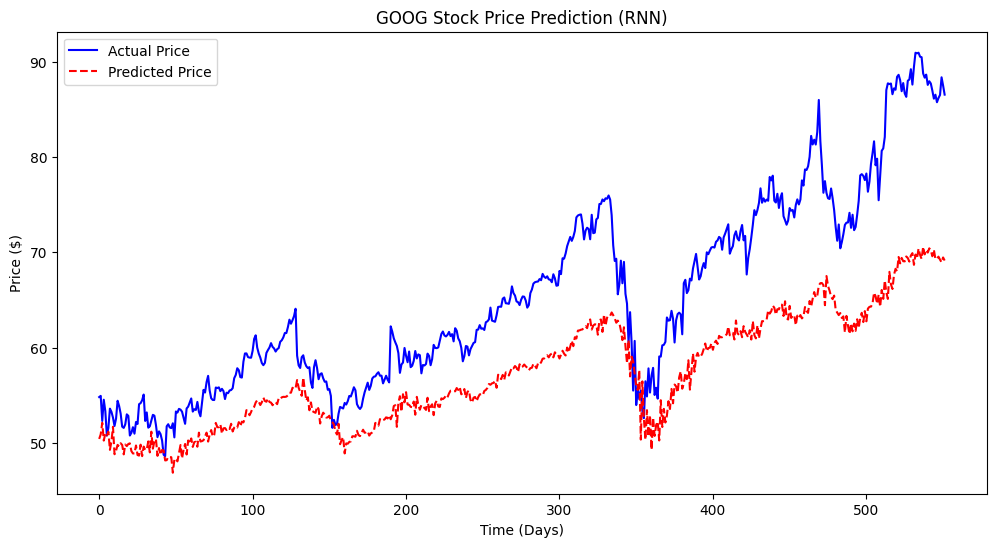

In [98]:

plt.figure(figsize=(12, 6))
plt.plot(y_test_actual, label="Actual Price", color='blue')
plt.plot(y_pred_actual, label="Predicted Price", color='red', linestyle='--')
plt.title(f"{ticker} Stock Price Prediction (RNN)")
plt.xlabel("Time (Days)")
plt.ylabel("Price ($)")
plt.legend()
plt.show()

In [99]:

mse = np.mean((y_test_actual - y_pred_actual) ** 2)
print(f"Mean Squared Error (MSE): {mse:.2f}")

Mean Squared Error (MSE): 85.23
